## 1. Loading Data and Packages

In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib
import time
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

In [90]:
# Load train and Test set

In [91]:
data = pd.read_csv('C:/Rishi/Projects/house_price_prediction_linear_reg_deployment/house_price.csv')

In [92]:
# Check the numbers of samples and features
data.head()

,Unnamed: 0,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,37,Bommanahalli,3,1,3000,1,3,28000
1,43,Bommanahalli,3,1,1650,10,0,18000
2,12,Whitefield,2,0,1000,5,3,16400
3,8,Whitefield,3,0,1600,1,9,27000
4,9,Whitefield,2,1,1200,5,1,20000


In [93]:
data.describe()

,Unnamed: 0,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.70200,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,14.14975,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,0.00000,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,13.00000,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,25.00000,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,37.00000,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,49.00000,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


## 2. Analyzing the Test Variable (Sale Price)

C:\Users\rishikem\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 22829.90 and sigma = 7702.56



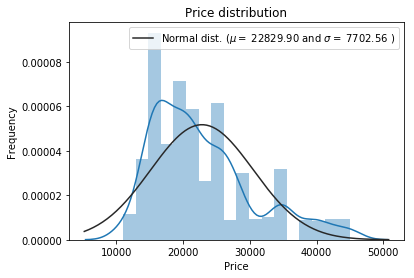

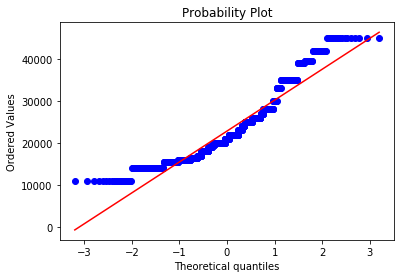

Skewness: 1.002736
Kurtosis: 0.452846


In [94]:
# Plot Histogram
sns.distplot(data['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)
plt.show()

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

In [95]:
data = data.iloc[:,1:]
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000


In [96]:
label_enc = LabelEncoder()
data.iloc[:,0] = label_enc.fit_transform(data.iloc[:,0])


In [97]:
data.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,0,3,1,3000,1,3,28000
1,0,3,1,1650,10,0,18000
2,1,2,0,1000,5,3,16400
3,1,3,0,1600,1,9,27000
4,1,2,1,1200,5,1,20000


In [98]:
X = data.drop('Price', axis=1)
y = data['Price']

In [99]:
X.head()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor
0,0,3,1,3000,1,3
1,0,3,1,1650,10,0
2,1,2,0,1000,5,3
3,1,3,0,1600,1,9
4,1,2,1,1200,5,1


In [100]:
y.head()

0    28000
1    18000
2    16400
3    27000
4    20000
Name: Price, dtype: int64

## 3. Modeling and Predictions

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1);

In [102]:
start = time.time()
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), activation="relu", batch_size=10, learning_rate_init=0.001, max_iter=400, random_state=1)
mlp.fit(X_train, y_train)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [103]:
pred = mlp.predict(X_test)
r2_score(y_test, pred)

0.6858944723775909

In [104]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 4. Calculate r2 score

In [105]:
pred = linear.predict(X_test)
r2_score(y_test, pred)

0.836332809556666

## 5. Save the model 

In [106]:
joblib.dump(linear, 'C:/Rishi/Projects/house_price_prediction_linear_reg_deployment/house_price.ml')

['C:/Rishi/Projects/house_price_prediction_linear_reg_deployment/house_price.ml']